# StyleGan Results

Below are fingings from running batchjobs using [stylgan2-adda-pytorch](https://github.com/NVlabs/stylegan2-ada-pytorch)'s generator. This experiment was run on machines with different GPUs to analyze the carbon footprint of generating images with the model. Our model is generating images from within the library. The finding of this experiment could be extrapolated past generating images to generating video ina naive way.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# TODO: add single v100 data
files = ["two_v100.csv", "three_v100.csv", "four_v100.csv"]

v100 = pd.concat([pd.read_csv(f) for f in files], ignore_index=True)
v100.tail()

,timestamp,project_name,run_id,duration,emissions,emissions_rate,cpu_power,gpu_power,ram_power,cpu_energy,...,cpu_count,cpu_model,gpu_count,gpu_model,longitude,latitude,ram_total_size,tracking_mode,on_cloud,pue
295,2025-05-01T02:21:13,StyleGAN2-ADA-PyTorch-Generation,0d78386e-ccac-428f-b4f5-aa571f281b1f,16.098871,0.000588,0.000037,104.205264,110.247,141.128566,0.000471,...,1,Intel(R) Xeon(R) Gold 6226R CPU @ 2.90GHz,4,4 x Tesla V100-PCIE-32GB,-71.0863,42.3687,376.342842,machine,N,1.0
296,2025-05-01T02:21:33,StyleGAN2-ADA-PyTorch-Generation,24115d3e-c75e-4309-95ee-84e21ff886be,15.213827,0.000949,0.000062,111.819331,109.754,141.128566,0.000447,...,1,Intel(R) Xeon(R) Gold 6226R CPU @ 2.90GHz,4,4 x Tesla V100-PCIE-32GB,-71.0863,42.3687,376.342842,machine,N,1.0
297,2025-05-01T02:21:53,StyleGAN2-ADA-PyTorch-Generation,b0d2c5dd-2ab8-4a4e-b0e3-4c88e3db16f8,15.760525,0.000577,0.000037,103.908857,110.234,141.128566,0.000463,...,1,Intel(R) Xeon(R) Gold 6226R CPU @ 2.90GHz,4,4 x Tesla V100-PCIE-32GB,-71.0863,42.3687,376.342842,machine,N,1.0
298,2025-05-01T02:22:13,StyleGAN2-ADA-PyTorch-Generation,e2f5a99d-5d4a-4289-9c93-94ee0d156ea3,16.153241,0.000663,0.000041,104.718916,110.219,141.128566,0.000474,...,1,Intel(R) Xeon(R) Gold 6226R CPU @ 2.90GHz,4,4 x Tesla V100-PCIE-32GB,-71.0863,42.3687,376.342842,machine,N,1.0
299,2025-05-01T02:22:33,StyleGAN2-ADA-PyTorch-Generation,3cb0a6e9-975b-478b-a4a3-e8e18cdde7f5,15.207833,0.000883,0.000058,0.000000,111.006,141.128566,0.000258,...,1,Intel(R) Xeon(R) Gold 6226R CPU @ 2.90GHz,4,4 x Tesla V100-PCIE-32GB,-71.0863,42.3687,376.342842,machine,N,1.0


# Understanding the data

Now that we've got some data loaded, let's see what codecarbon provides.

In [4]:
v100.columns

Index(['timestamp', 'project_name', 'run_id', 'duration', 'emissions',
       'emissions_rate', 'cpu_power', 'gpu_power', 'ram_power', 'cpu_energy',
       'gpu_energy', 'ram_energy', 'energy_consumed', 'country_name',
       'country_iso_code', 'region', 'cloud_provider', 'cloud_region', 'os',
       'python_version', 'codecarbon_version', 'cpu_count', 'cpu_model',
       'gpu_count', 'gpu_model', 'longitude', 'latitude', 'ram_total_size',
       'tracking_mode', 'on_cloud', 'pue'],
      dtype='object')

# Codecarbon

Some interseting data could be the emissions rate 

# V100 Investigation

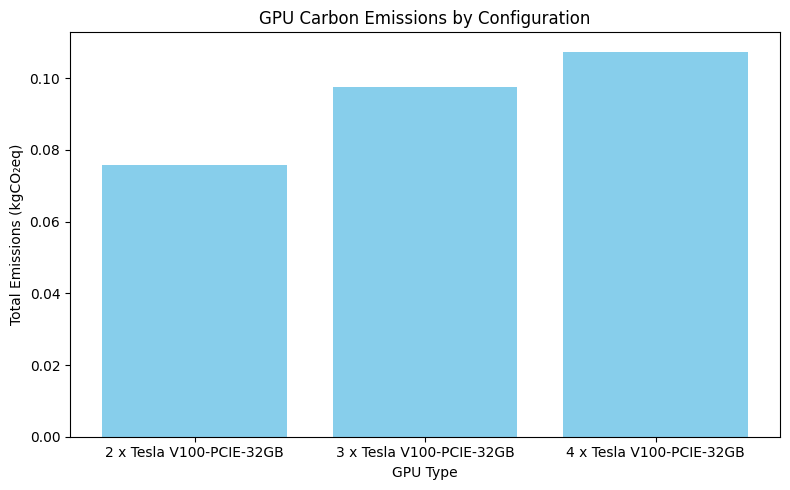

In [8]:
v100_emissions_by_gpu = v100.groupby("gpu_model")["emissions"].sum().reset_index()
plt.figure(figsize=(8, 5))
plt.bar(v100_emissions_by_gpu["gpu_model"], v100_emissions_by_gpu["emissions"], color="skyblue")
plt.xlabel("GPU Type")
plt.ylabel("Total Emissions (kgCO₂eq)")
plt.title("GPU Carbon Emissions by Configuration")
plt.tight_layout()
plt.show()

/var/folders/ny/gwlvgygd3bn6p3xdkbrb26_w0000gn/T/ipykernel_90153/2476004959.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=v100_emissions_by_gpu, x="gpu_model", y="emissions", palette="viridis")


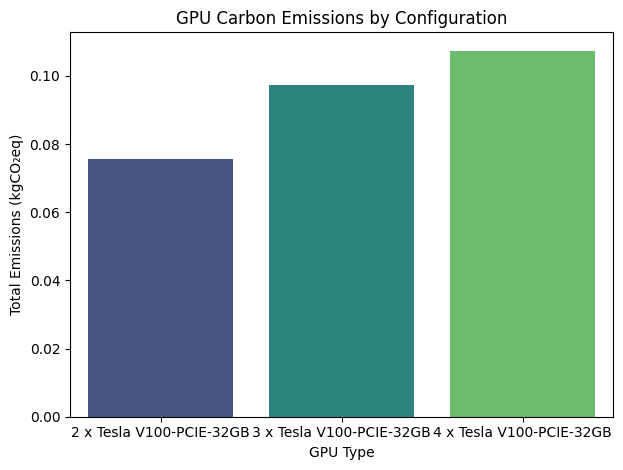

In [11]:
import seaborn as sns

sns.barplot(data=v100_emissions_by_gpu, x="gpu_model", y="emissions", palette="viridis")
plt.xlabel("GPU Type")
plt.ylabel("Total Emissions (kgCO₂eq)")
plt.title("GPU Carbon Emissions by Configuration")
plt.tight_layout()
plt.show()

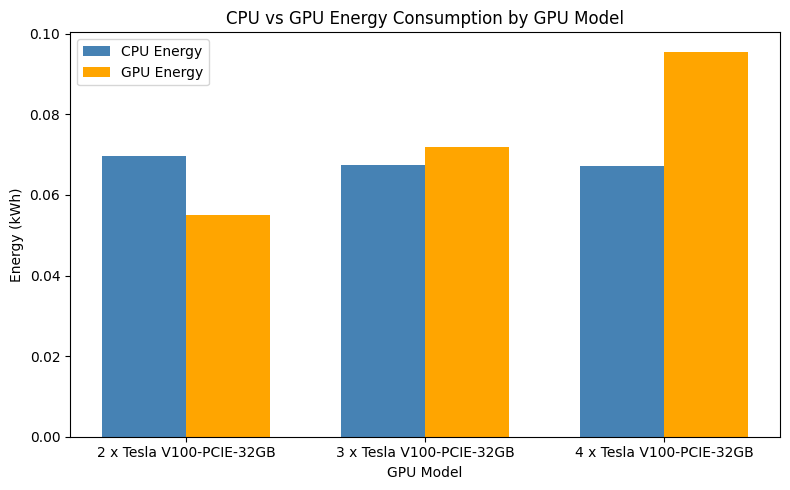

In [13]:
energy_summary = v100.groupby("gpu_model")[["cpu_energy", "gpu_energy"]].sum().reset_index()

# Set up
labels = energy_summary["gpu_model"]
cpu = energy_summary["cpu_energy"]
gpu = energy_summary["gpu_energy"]

x = range(len(labels))
width = 0.35  # width of bars

# Plot
fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(x, cpu, width, label='CPU Energy', color='steelblue')
ax.bar([i + width for i in x], gpu, width, label='GPU Energy', color='orange')

# Labels and layout
ax.set_xlabel("GPU Model")
ax.set_ylabel("Energy (kWh)")
ax.set_title("CPU vs GPU Energy Consumption by GPU Model")
ax.set_xticks([i + width / 2 for i in x])
ax.set_xticklabels(labels)
ax.legend()

plt.tight_layout()
plt.show()


In [14]:
v100_power_by_gpu = v100.groupby("gpu_power")["emissions"].sum().reset_index()
plt.figure(figsize=(8, 5))
plt.bar(emissions_by_gpu["gpu_model"], emissions_by_gpu["gpu_power"], color="skyblue")
plt.xlabel("GPU Type")
plt.ylabel("Total Emissions (kgCO₂eq)")
plt.title("GPU Carbon Emissions by Configuration")
plt.tight_layout()
plt.show()

NameError: name 'emissions_by_gpu' is not defined

<Figure size 800x500 with 0 Axes>

In [5]:
# Load emissions data
prefix="0501_011919"

df = pd.read_csv(prefix + "/emissions.csv")
df.tail()

FileNotFoundError: [Errno 2] No such file or directory: '0501_011919/emissions.csv'

In [42]:
np.mean(df["gpu_energy"])

np.float64(5.091698189202281e-05)

In [30]:
def plot(x, y, title):
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, label="Emissions (kg CO₂)", color="green")
    plt.xlabel("Time")
    plt.ylabel("Emissions (kg CO₂)")
    plt.title(title)
    plt.legend(title="GPU Model", loc="upper left") 
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    ax.legend()
    

Index(['timestamp', 'project_name', 'run_id', 'duration', 'emissions',
       'emissions_rate', 'cpu_power', 'gpu_power', 'ram_power', 'cpu_energy',
       'gpu_energy', 'ram_energy', 'energy_consumed', 'country_name',
       'country_iso_code', 'region', 'cloud_provider', 'cloud_region', 'os',
       'python_version', 'codecarbon_version', 'cpu_count', 'cpu_model',
       'gpu_count', 'gpu_model', 'longitude', 'latitude', 'ram_total_size',
       'tracking_mode', 'on_cloud', 'pue'],
      dtype='object')

ValueError: 'bottom left' is not a valid value for loc; supported values are 'best', 'upper right', 'upper left', 'lower left', 'lower right', 'right', 'center left', 'center right', 'lower center', 'upper center', 'center'

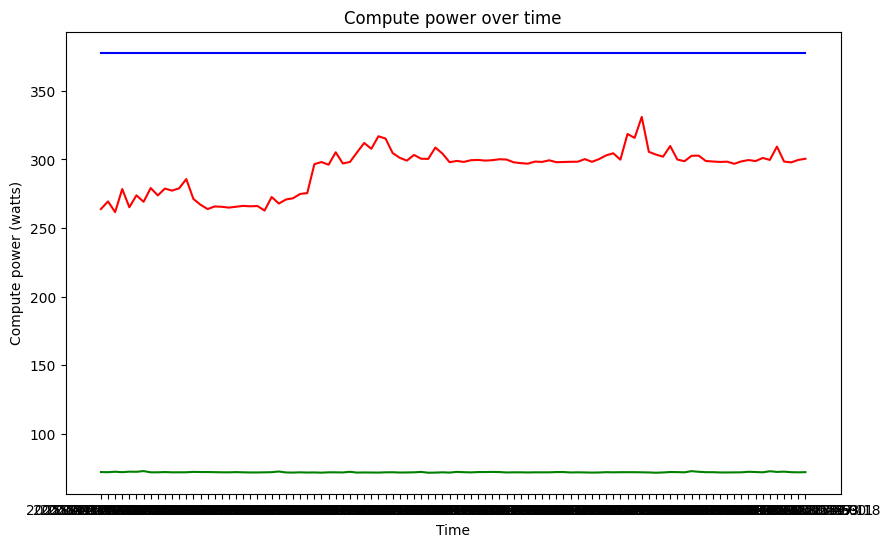

In [50]:
plt.figure(figsize=(10, 6))
x = df["timestamp"]
y1 = df["cpu_power"]
y2 = df["gpu_power"]
y3 = df["ram_power"]

plt.plot(x, y1, label='CPU', color='red')
plt.plot(x, y2, label='GPU', color='green')
plt.plot(x, y3, label='RAM', color='blue')
plt.title("Compute power over time")
plt.xlabel("Time")
plt.ylabel("Compute power (watts)")
plt.legend(title="Compute", loc="bottom left")
plt.show()

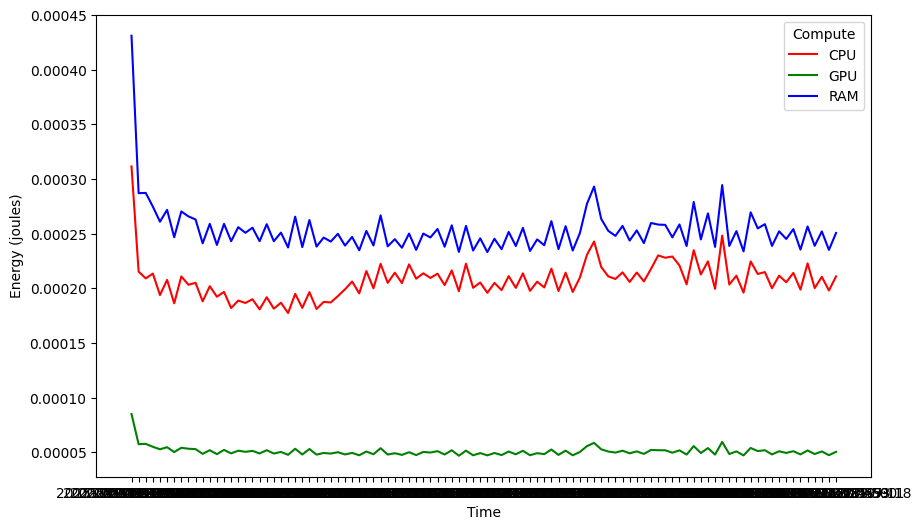

NameError: name 'ax' is not defined

In [49]:
plt.figure(figsize=(10, 6))
x = df["timestamp"]
y1 = df["cpu_energy"]
y2 = df["gpu_energy"]
y3 = df["ram_energy"]

plt.plot(x, y1, label='CPU', color='red')
plt.plot(x, y2, label='GPU', color='green')
plt.plot(x, y3, label='RAM', color='blue')
plt.xlabel("Time")
plt.ylabel("Energy (joules)")
plt.legend(title="Compute", loc="upper right")
plt.show()
ax.legend()

In [48]:
#Bar Graphs

#1 node vs 2 nodes, for each GPU for power and emissions
# add baseline (dotted line) for lightbulb emissions/ 



In [24]:
# Convert timestamps to datetime objects
df["timestamp"] = pd.to_datetime(df["timestamp"])

# Calculate time delta in seconds from the first timestamp
df["elapsed_seconds"] = (df["timestamp"] - df["timestamp"].iloc[0]).dt.total_seconds()

# Plot emissions over time  
plot(df["timestamp"], df["emissions"], "Emissions Over Time – StyleGAN2-ADA-PyTorch")

TypeError: plot() takes 2 positional arguments but 3 were given

In [20]:
plot(df["timestamp")

<function __main__.plot(x, y)>

In [13]:
df["emission_rate"] = df["emissions"].diff() / df["elapsed_seconds"].diff()

# Plot emissions over time
plt.figure(figsize=(10, 6))
plt.plot(df["timestamp"], df["emission_rate"], label="Emission Rate (kg CO₂)", color="green")
plt.xlabel("Time")
plt.ylabel("Emissions (kg CO₂)")
plt.title("Emissions Over Time – StyleGAN2-ADA-PyTorch")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

KeyError: 'elapsed_seconds'